<a href="https://colab.research.google.com/github/blackdevil0071/Sport-Analysis/blob/main/sports_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data science and Business Analytics internship**

**Task 5 = Exploratory Data Analysis [Sports]**

**Author : Suhas Kumar r**

In [ ]:
#Importing all the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading the CSV file.

match = pd.read_csv("/content/matches.csv")
match.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [ ]:
#dropping unnecessary columns

match.drop(["city","date","umpire1","umpire2","umpire3","dl_applied","result"],axis=1).head()


,id,season,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [ ]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
len(match["season"].unique())

12

In [ ]:
pd.concat([match["team1"],match["team2"]]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

**Winning teams**

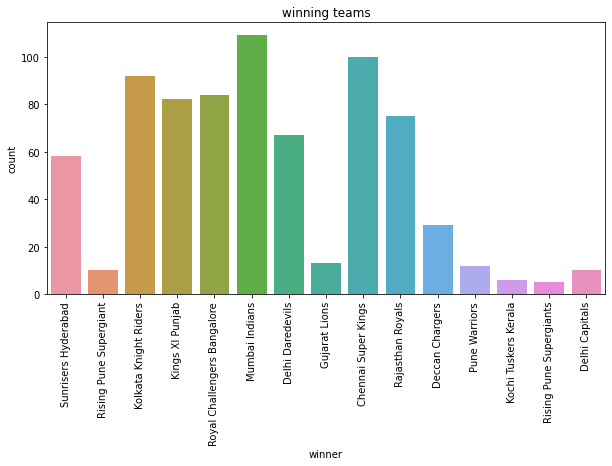

In [ ]:
#winners.
plt.figure(figsize=(10,5))
sns.countplot(x="winner",data=match)
plt.title("winning teams")
plt.xticks(rotation = 90)
plt.show()

Mumbai indians has won the most matches in ipl.

**Man of the match awards**

In [ ]:
#most player_of_the_match awards.

match["player_of_match"].value_counts().head()

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

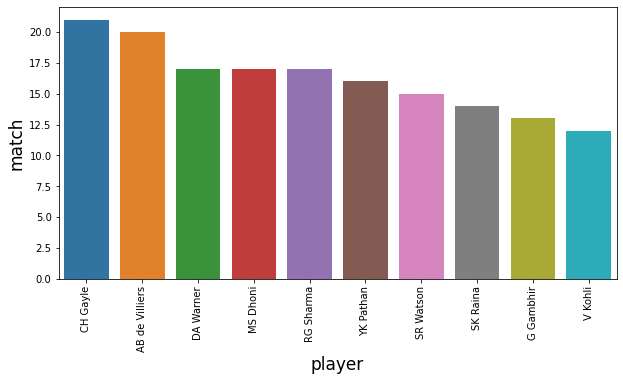

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=match.player_of_match.value_counts().head(10).index,y=match.player_of_match.value_counts().head(10))
plt.xlabel("player",fontsize=17)
plt.ylabel("match",fontsize=17)
plt.xticks(rotation = 90)
plt.show()

**CH Gayle is most successful player in the IPL and has got the most Player of the match award**

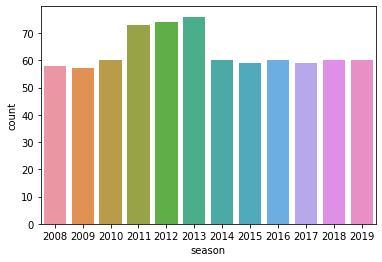

In [ ]:
#Total number of matches in each season
sns.countplot(x=match["season"].sort_values())
plt.show()

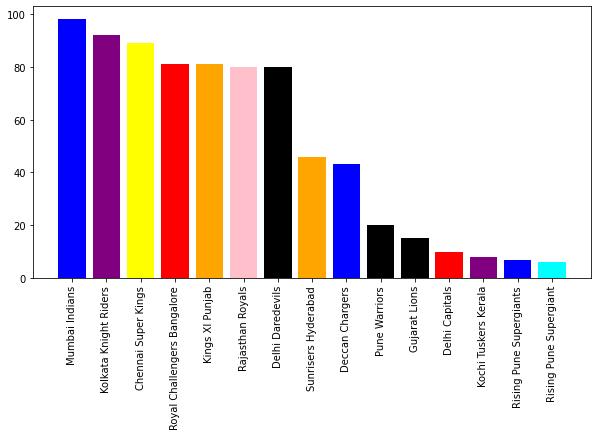

In [ ]:
#Most tosses won by a team 

plt.figure(figsize=(10,5))
plt.bar(list(match["toss_winner"].sort_values().value_counts().keys()),list(match["toss_winner"].value_counts()),color=['blue', 'purple', 'yellow', 'red', 'orange','pink', 'black', 'orange', 'blue', 'black','black', 'red', 'purple', 'blue', 'cyan'])
plt.xticks(rotation = 90)
plt.show()

Mumbai indians has won the most tosses in ipl.

**Toss Decisions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


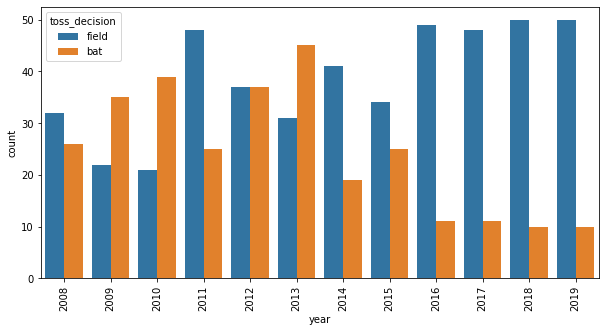

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(match["season"].sort_values(),hue=match["toss_decision"])
plt.xlabel("year")
plt.ylabel("count")
plt.xticks(rotation = 90)
plt.show()

**Team winning after batting first**

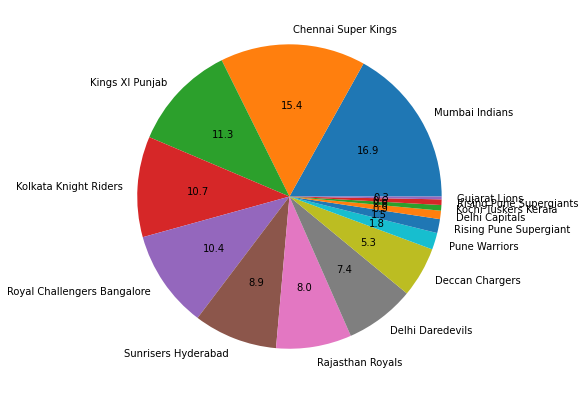

In [ ]:
batting_first = match[match["win_by_runs"]!=0]
plt.figure(figsize=(7,7))
plt.pie(list(batting_first["winner"].value_counts()),labels=list(batting_first["winner"].value_counts().keys()),autopct="%0.1f")
plt.show()

**Team winning after batting second**

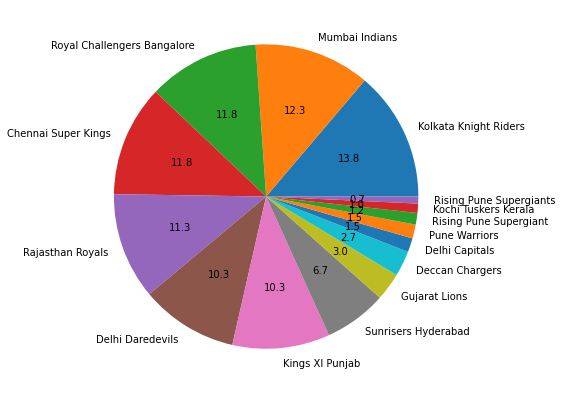

In [ ]:
batting_second = match[match["win_by_wickets"]!=0]
plt.figure(figsize=(7,7))
plt.pie(list(batting_second["winner"].value_counts()),labels=list(batting_second["winner"].value_counts().keys()),autopct="%0.1f")
plt.show()

**Match Venues**

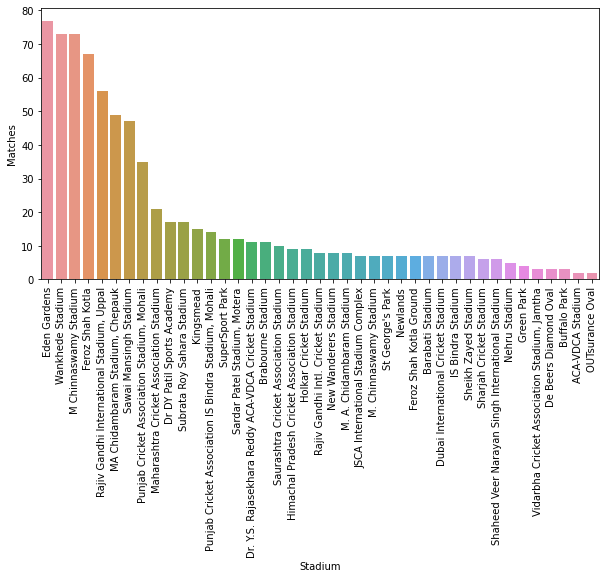

In [ ]:
#Number of matches played in the respective stadiums.

plt.figure(figsize=(10,5))
sns.countplot(x="venue",data=match,order=match["venue"].value_counts().index)
plt.xlabel("Stadium")
plt.ylabel("Matches")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
deli = pd.read_csv("/content/deliveries.csv")
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2.0,2.0,NaN,NaN,NaN


In [ ]:
deli.nunique()

match_id            436
inning                4
batting_team         13
bowling_team         13
over                 20
ball                  9
batsman             428
non_striker         424
bowler              325
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          7
extra_runs            6
total_runs            8
player_dismissed    399
dismissal_kind        8
fielder             402
dtype: int64

In [ ]:
sum(deli["noball_runs"])

476

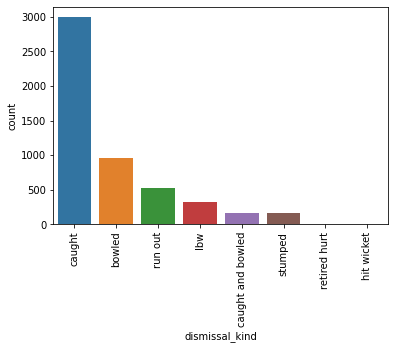

In [ ]:
sns.countplot(x=deli["dismissal_kind"],data=deli)
plt.xticks(rotation=90)
plt.show()

Most dismissals are by caught.

**Most succesful team in ipl is Mumbai indians.**

**Most succesful player in ipl is CH gayle.**

**Factors like winning toss,weather are contributing to win or loss.**

**Task 5 Completed**